In [1]:
# install onnx runtime locally 
# %pip install onnxruntime

In [2]:
# to download images using PIL package
# %pip install pillow

In [3]:
# importing and viewing the model
import onnxruntime as ort

onnx_model_path = '08-serverless-homework/hair_classifier_v1.onnx'

session = ort.InferenceSession(onnx_model_path, providers=['CPUExecutionProvider'])

# QUESTION 1 - Name of the output

In [4]:
# get the inputs and outputs
inputs = session.get_inputs()
outputs = session.get_outputs()

In [5]:
# the name of the first input and output
input_name = inputs[0].name
output_name = outputs[0].name

In [6]:
input_name

'input'

In [7]:
output_name

'output'

The name of the output of the given model is 'output'

# QUESTION 2 - Downloading image and preparing it for output

In [8]:
from io import BytesIO
from urllib import request

from PIL import Image

def download_image(url):
    with request.urlopen(url) as resp:
        buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)
    return img


def prepare_image(img, target_size):
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize(target_size, Image.NEAREST)
    return img

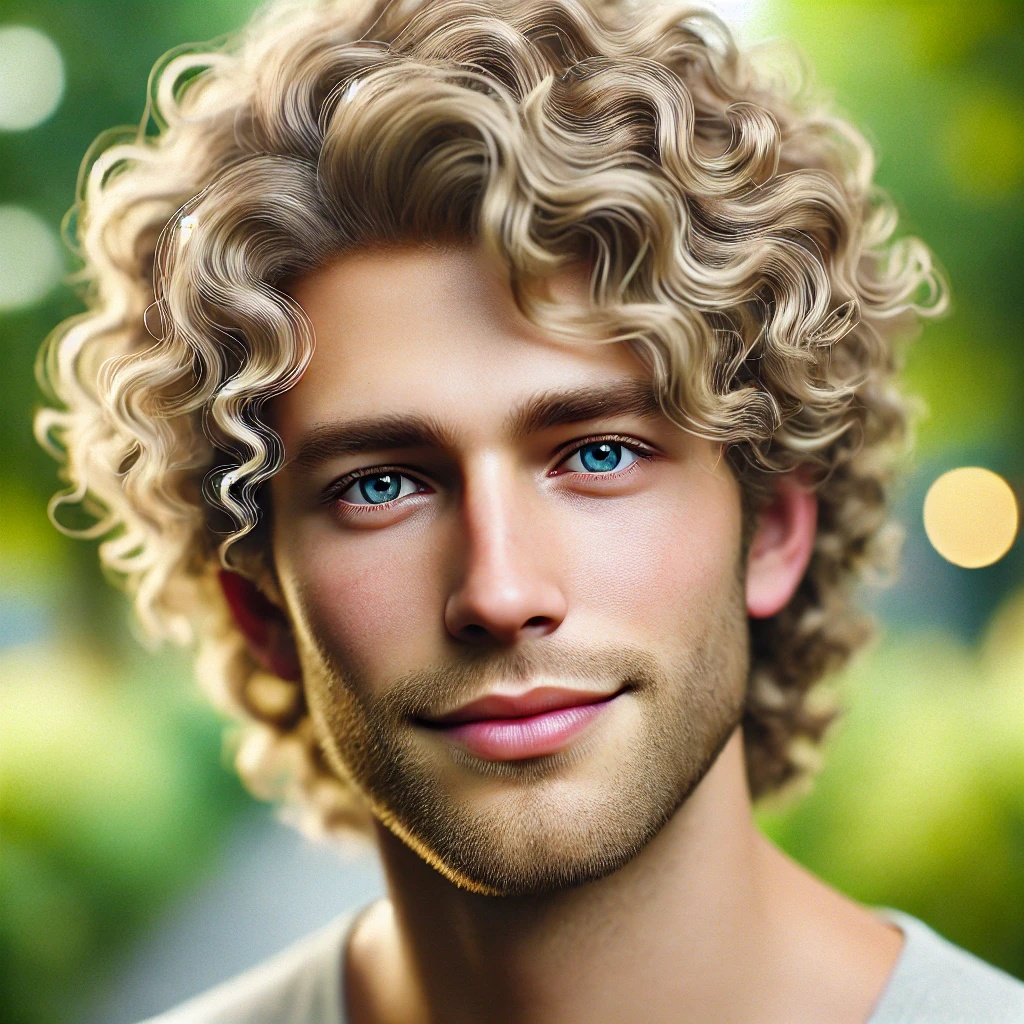

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1024 at 0x267A131E7B0>


In [9]:
# downloading the image
temp_img_url = 'https://habrastorage.org/webt/yf/_d/ok/yf_dokzqy3vcritme8ggnzqlvwa.jpeg'

temp_img = download_image(temp_img_url)

display(temp_img)
print(temp_img)

In [10]:
# the target input image size needs to be
target_size = (200, 200)

In [11]:
# importing numpy
import numpy as np

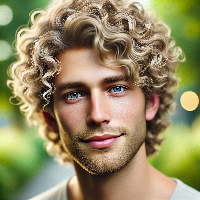

In [12]:
temp_img_resized = prepare_image(temp_img, target_size=target_size)

display(temp_img_resized)

Based on the previous homework, the target size for the image needs to be image size 200 x 200

# QUESTION 3 - Value of Red in first pixel after pre-processing the image

In [13]:
# importing preprocessing modules
from torch.utils.data import Dataset
from torchvision import transforms
import os

In [14]:
# normalization values for rgb values after totensor transformation
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# image transformations for training and test set
img_transform = transforms.Compose([
    transforms.Resize((200, 200)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

In [15]:
# loading the images
temp_ppimg = img_transform(temp_img_resized)
temp_ppimg

tensor([[[-1.0733, -1.0048, -1.0390,  ..., -1.0733, -1.0733, -1.2103],
         [-1.0562, -1.0219, -1.0048,  ..., -1.0219, -1.0562, -1.1760],
         [-0.9534, -0.9705, -0.9192,  ..., -1.0219, -1.1075, -1.2274],
         ...,
         [-1.6727, -1.6727, -1.5185,  ...,  1.7352,  1.6495,  1.7865],
         [-1.6727, -1.6555, -1.6384,  ...,  1.6838,  1.5982,  1.7009],
         [-1.6384, -1.7240, -1.6727,  ...,  1.7180,  1.7352,  1.6838]],

        [[-0.2150, -0.1099, -0.1099,  ..., -0.5126, -0.4776, -0.6352],
         [-0.1975, -0.1625, -0.1625,  ..., -0.5126, -0.5476, -0.6001],
         [-0.0749, -0.1275, -0.1450,  ..., -0.4776, -0.6001, -0.7052],
         ...,
         [-1.1429, -1.1429, -0.9678,  ...,  2.0609,  1.9734,  2.1134],
         [-1.1954, -1.1253, -1.0903,  ...,  2.0084,  1.9734,  2.0784],
         [-1.1954, -1.1954, -1.1429,  ...,  2.0434,  2.0784,  2.0609]],

        [[-1.4210, -1.2990, -1.2467,  ..., -1.8044, -1.7173, -1.7870],
         [-1.3513, -1.3164, -1.2641,  ..., -1

In [16]:
# the shape of the RGB channeled image sized 200x200 pixels
temp_ppimg.shape

torch.Size([3, 200, 200])

In [17]:
# finding the first pixel in the R channel
# R channel [index 0] --> first row [index 0] --> first column [index 0]
temp_ppimg[0][0][0]

tensor(-1.0733)

The first pixel's red channel has a value of **-1.0733** after usual image preprocessing

# QUESTION 4 - Applying the model to the image and finding the output


In [18]:
temp_ppimg.unsqueeze(0).numpy().shape

(1, 3, 200, 200)

In [20]:
result = session.run([output_name], {input_name: temp_ppimg.unsqueeze(0).numpy()})
predictions = result[0][0].tolist()

print('Image prediction probability:', predictions)

Image prediction probability: [0.09156641364097595]


The output of the model: 0.09156

# QUESTION 5 - Size fo the base image

Converting the notebook to a script by running

_jupyter nbconvert --to script 08-serverless-homework.ipynb --output-dir="08-serverless-homework"_

In [ ]:
# size of the docker image: agrigorev/model-2025-hairstyle:v1
# $ docker images
# REPOSITORY
# agrigorev/model-2025-hairstyle

# TAG
# v1

# IMAGE ID
# 4528ad1525d5

# CREATED
# 8 days ago

# SIZE
# 608MB

The size of the base image agrigorev/model-2025-hairstyle:v1 is: **608 MB**